In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas

You should consider upgrading via the 'd:\jojo\stuff\notebooks\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\jojo\stuff\notebooks\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In the previous example, we used one input.  We call that a feature, or $x$.  And we also introduced the dummy feature $x_0$ that is always 1.  This completes our equation for the hypothesis, $h_\theta$, which is based on all the features plus our parameters, $\theta$:

$$
h_\theta(x) = \sum_{j=1}^n(\theta_jx_j)
$$

where
- $\theta_j$ is our parameter at index $j$, which is our goal in linear regression
- $x_j$ is our input feature at index $j$
- $n$ is the number of features
- $j$ is the index of the feature

For example, when we have one feature, we would end up with this equation that looks like a basic linear equation:

$$
h_\theta(x) = \theta_0x_0 + \theta_1x_1
$$

(remember $x_0$ is 1)

And now that we have multiple samples, for each sample, we will indicate the hypothesis of the sample as $h_\theta(x)^{(i)}$, with a little $i$ on top, meaning the $i$th sample.  And our $i$th training $y$ would be indicated by $y^{(i)}$.

The steps of linear regression are

1. Pick some $\theta_{0}$ and $\theta_{1}$
2. Calculate $h_{\theta}(x)$ for every given sample of $x$
3. Compare the calculated value with the actual value.  Calculate the overall error level (known as cost function $J$)
   by using
   $$
     \frac12\sum_{i=1}^m(h_\theta(x)^{(i)} - y^{(i)})^2
   $$
   where    
   - $m$ is the number of training samples
   - $y$ is the actual value of training sample for a given $x$
   - $i$ is the index of the training sample
   - $x^{(i)}$ is the $x$ of the the training sample of index $i$
   - $j$ is the index of the input variable
   - $n$ is the number of input variabls per training sample
4. Minimize the cost function $J$

The above is the official definition but hard to comprehend all at once.
- To make our lives easier, collectively we will call $\theta_0$, $\theta_1$, $\theta_2$, ... as $\theta$.  As we will see later, linear algebra allows us to treat arrays as single values.
- Similarly, $x$ is all our input values (every feature and every sample)
- $y$ is all our training target
- $h_\theta(x)$ is our hypothesis calcuated with $x$ and $\theta$

Now our simplified cost $J$ would look like:

$$
\frac12(h_\theta(x) - y)^2
$$

Kind of makes sense, without all the $\sum$ and tiny symbols.

This time we will try a "true" linear training set.

|x  |y  |
|---|---|
|1  |3  |
|5  |11 |
|2  |5  |

At this point, we are still using one input feature so we are not overwhelmed when we try to debug our algorithm.

In [3]:
training_x = np.array([1, 5, 2])
training_y = np.array([3, 11, 5])
theta = np.array([0, 0])

In the previous example, we just added the $x_0$ into our initial training data.  There was only one sample, so it was easy.  But with multiple samples, training data $x$ looks like 

$$
\begin{vmatrix}
1 \\
5 \\
2 \\
\end{vmatrix}
$$

We want to pad it with a 1 so that the number of input variables (in our case, 1) equals the number of thetas (2).  The number of thetas is always 1 more than the number of input variables.  Don't get confused -- we have only one input variable for every training sample; however, we do have multiple training samples.  Refer to our notation guide from the previous example:
   - $m$ is the number of training samples
   - $y$ is the actual value of training sample for a given $x$
   - $i$ is the index of the training sample
   - $x^{(i)}$ is the $x$ of the the training sample of index $i$
   - $j$ is the index of the input variable
   - $n$ is the number of input variabls per training sample

In this example, $n$ is 1.

Once we pad the 1, we will have this training data:

$$
\begin{vmatrix}
1 \ \ \ 1 \\
1 \ \ \ 5 \\
1 \ \ \ 2 \\
\end{vmatrix}
$$

Our hypothesis is calculated as:

$$
\begin{vmatrix}
1\theta_0 + 1\theta_1 \\
1\theta_0 + 5\theta_1 \\
1\theta_0 + 2\theta_1 \\
\end{vmatrix}
$$



In [4]:
# we want
#    theta0 * x0 + theta1 * x1
# (and remember x0 is set to 1 to simplify calculation)
def padded_training_x(training_x):
    # training_x looks like 1, 5, 2
    size_of_sample = training_x.size
    padding = np.ones(size_of_sample)    
    padded = np.array([padding, training_x])
    # but we want it in a different orientation
    return padded.T
padded_training_x(training_x)

array([[1., 1.],
       [1., 5.],
       [1., 2.]])

In [5]:
def hypothesis_theta(training_x, theta):
    return padded_training_x(training_x) @ theta
current_hypothesis = hypothesis_theta(training_x, theta)
current_hypothesis

array([0., 0., 0.])

One hypothesis for each sample.

In [6]:
def cost(hypothesis, training_y):
    return np.sum((hypothesis - training_y) ** 2) / 2
current_cost = cost(current_hypothesis, training_y)
current_cost

77.5

Still one cost because cost is based on all samples.

Now to calclate our slope.  For completeness, here's the official equation:

$$
slope = \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j
$$

In [7]:
def slope(hypothesis, training_y, training_x):
    # we have our padded training samples
    # 1  1
    # 1  5
    # 1  2

    # for each row, we want to multiply by the difference
    # 1 x -3    1 x -3
    # 1 x -11   5 x -11
    # 1 x -15   2 x -15

    # then we want to sum up by column
    # 1 x -3 + 1 x - 11 + 1 x -15         1 x -3 + 5 x -11 + 2 x -15
    
    # looks awefully like
    #
    # | 1 1 1 |     | -3|
    # | 1 5 2 |  X  |-11|
    #               |-15|
    return padded_training_x(training_x).T @ (hypothesis - training_y)
current_slope = slope(current_hypothesis, training_y, training_x)
current_slope

array([-19., -68.])

It's the same equation as in previous examples but with multiple features and samples.  Suddenly it looks impossible to compute, or does it? (Remember, there is one slope for each feature.)

And our gradient descent step becomes:

$$
\theta_j = \theta_j - \alpha\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j
$$

In [8]:
def gradient_descent(theta, hypothesis, training_y, learning_rate_alpha):
    return theta - learning_rate_alpha * slope(hypothesis, training_y, training_x)
gradient_descent(theta, current_hypothesis, training_y, 0.1)

array([1.9, 6.8])

In [9]:
def find_minimum(training_x, training_y):
    max_iterations = 100
    theta = np.array([0, 0])
    iteration = 0
    acceptable_slope = 0.00005
    learning_rate_alpha = 0.01
    current_hypothesis = hypothesis_theta(training_x, theta)
    current_slope = slope(current_hypothesis, training_y, training_x)
    current_cost = cost(hypothesis_theta(training_x, theta), training_y)
    while abs(np.average(current_slope)) > acceptable_slope and iteration < max_iterations:
        current_hypothesis = hypothesis_theta(training_x, theta)
        current_cost = cost(current_hypothesis, training_y)
        current_slope = slope(current_hypothesis, training_y, training_x)
        theta = gradient_descent(theta, current_hypothesis, training_y, learning_rate_alpha)
        print((theta, current_hypothesis, current_slope, current_cost))
        iteration += 1
    return (theta, current_hypothesis, current_slope, current_cost)

Let's go through one round of gradient descent just to make sure it makes sense:

In [10]:
theta_round_0 = np.array([0, 0])
#          x   hypothesis
# (0)(1) + 0            0
# (0)(5) + 0            0
# (0)(2) + 0            0
hypothesis_round_0 = hypothesis_theta(training_x, theta_round_0)
hypothesis_round_0

array([0., 0., 0.])

In [11]:
#          x   hypothesis  y  difference  difference**2
# (0)(1) + 0            0  3          -3              9
# (0)(5) + 0            0 11         -11            121
# (0)(2) + 0            0  5          -5             25

# total                                             155
cost_round_0 = cost(hypothesis_round_0, training_y)
cost_round_0

77.5

In [12]:
#          x   hypothesis  y  difference  slope_for_theta_0 slope_for_theta_1
# (0)(1) + 0            0  3          -3                 -3                -3
# (0)(5) + 0            0 11         -11                -11               -55
# (0)(2) + 0            0  5          -5                 -5               -10

# total                                                 -19               -68

slope_round_0 = slope(hypothesis_round_0, training_y, training_x)
slope_round_0

array([-19., -68.])

In [13]:
find_minimum(training_x, training_y)

(array([0.19, 0.68]), array([0., 0., 0.]), array([-19., -68.]), 77.5)
(array([0.3199, 1.1408]), array([0.87, 3.59, 1.55]), array([-12.99, -46.08]), 35.673750000000005)
(array([0.409039, 1.452968]), array([1.4607, 6.0239, 2.6015]), array([ -8.9139, -31.2168]), 16.441908974999997)
(array([0.47053039, 1.66435448]), array([1.862007, 7.673879, 3.314975]), array([ -6.149139, -21.138648]), 7.598709112657499)
(array([0.51326612, 1.8074057 ]), array([2.13488487, 8.79230279, 3.79923935]), array([ -4.27357299, -14.30512248]), 3.5320886488925596)
(array([0.54327568, 1.9041227 ]), array([2.32067182, 9.55029464, 4.12807753]), array([-3.000956 , -9.6716999]), 1.6616905919121403)
(array([0.56464759, 1.96942384]), array([ 2.44739838, 10.0638892 ,  4.35152109]), array([-2.13719133, -6.53011345]), 0.8010984392836744)
(array([0.58015426, 2.01342488]), array([ 2.53407143, 10.41176678,  4.50349527]), array([-1.55066651, -4.40010411]), 0.4048123470338611)
(array([0.59167564, 2.04298507]), array([ 2.59357914,

(array([0.81317962, 2.05119707]),
 array([ 2.86327241, 11.06972813,  4.91488634]),
 array([-0.15211312,  0.04168574]),
 0.015400389871152885)

Compare our result with the correct $\theta_0 = 1$ and $\theta_1 = 2$

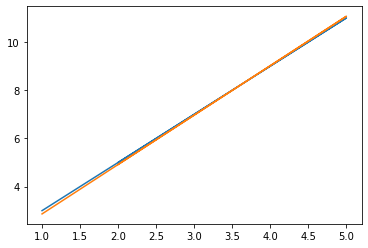

In [14]:
plt.plot(training_x, training_y)
plt.plot(training_x, hypothesis_theta(training_x, np.array([0.8132, 2.0512])))